<a href="https://colab.research.google.com/github/thenik2001/ML-project/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np



setting up training data now



In [0]:
celsius_train= np.array([-100,-95,50,-50,56,78,93,-6,43,11], dtype=float)
fahrenheit_train= np.array([-148,-139,122,-58,168.8,172.4,199.4,21.2,109.4,51.8], dtype=float)
for i,c in enumerate(celsius_train):
  print("for {} celsius fahrenheit is: {}".format(c,fahrenheit_train[i]))

for -100.0 celsius fahrenheit is: -148.0
for -95.0 celsius fahrenheit is: -139.0
for 50.0 celsius fahrenheit is: 122.0
for -50.0 celsius fahrenheit is: -58.0
for 56.0 celsius fahrenheit is: 168.8
for 78.0 celsius fahrenheit is: 172.4
for 93.0 celsius fahrenheit is: 199.4
for -6.0 celsius fahrenheit is: 21.2
for 43.0 celsius fahrenheit is: 109.4
for 11.0 celsius fahrenheit is: 51.8


building a single dense layer to predict values

In [0]:
l1=tf.keras.layers.Dense(units=1, input_shape=[1])



here **units** specifies the no. of neurons in the layer
and **input_shape** implies that the input of this layer is a single value



now assembling the layer into a model, we can assemble more than one layer as per our need 

In [0]:
model=tf.keras.Sequential(l1)



now compiling the model with loss function and optimizer
**loss function** is a way of measuring how far is the output from the desired output
**optimizer** reduces the loss to make increase the accuracy



In [0]:
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))



the loss function "root mean squared" and the optimizer "Adam" used are the most standard elements used in such kind of simple problems


**(0.1)** provided is teh step size taken in the optimization to improve the model, larger the value is lower the accuracy and if the value is much lower it'll take that much extra time to get trained



**Train the model**

calling fit method to train the model

In [0]:
history = model.fit(celsius_train,fahrenheit_train,epochs=500,verbose=False)
print("finished model training")

finished model training


Here 1 **epoch** is iterating through the given training set once, hence it controls how many times this cycle should run

and **verbose** controls how much output the method produces

**Displaying training stastics** using matplotlib



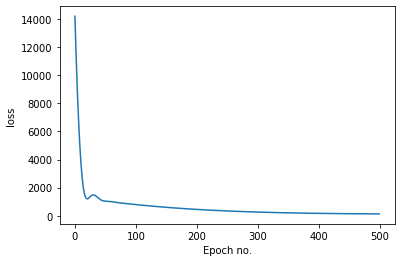

In [0]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch no.')
plt.ylabel('loss ')
plt.plot(history.history['loss'])

Now using **predict** model to check if our model is working perfectly or not

In [0]:
print(model.predict([60]))

[[142.01814]]


the correct answer is 59*1.8+32= 138.2

so the prediction is too close


**looking at the layer weights now**

In [0]:
print("layer variables are {}".format(l1.get_weights()))

layer variables are [array([[1.8481642]], dtype=float32), array([30.813087], dtype=float32)]


as we can see the variables are 1.84 and 30.81, which are pretty close to 1.8 and 32 so it is a good model

We can try for some more dense layers to see that accuracy increases or not

In [0]:
l1=tf.keras.layers.Dense(units=2,input_shape=[1])
#l2=tf.keras.layers.Dense(units=2)
l3=tf.keras.layers.Dense(units=1)
model= tf.keras.Sequential([l1,l3])
model.compile(loss='mean_squared_error',optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_train,fahrenheit_train,epochs=500,verbose=False)
print("finished training model")
print("now prediction for 60", model.predict([60.0]))                        

finished training model
now prediction for 60 [[145.6765]]


So with increase and simple training set you can get more accuracy.